# Homework 1: 2D Interpolation & Fitting

## Table of Contents
- [0 - Packages](#0)
- [1 - Homework Requirements](#1)
    - [1.1 - Overall](#1-1)
    - [1.2 - Interpolation Type Fitting Method](#1-2)
    - [1.3 - Approximation Type Fitting Method](#1-3)
    - [1.4 - Purpose of the Homework](#1-4)
- [2 - Interpolation](#2)
    - [2.1 - Power Basis Function (Polynomial)](#2-1)
    - [2.2 - Gaussian Basis Function](#2-2)
- [3 - Fitting](#3)
    - [3.1 - Power Basis Function (Linear Regression)](#2-1)
    - [3.2 - Power Basis Function with Regularization term (Ridge Regression)](#2-2)
- [4 - Summary](#4)
    - [4.1 - All Plot in One](#4-1)
    - [4.2 - Interactive Input](#4-2)
- [5 - Reference](#5)

<a name='0'></a>
## 0. Package and Testing Data

In [1]:
# Pakages
import numpy as np
import matplotlib.pyplot as plt

# # Integrated framework
# import Interpolation
# import Fitting

import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from util import util

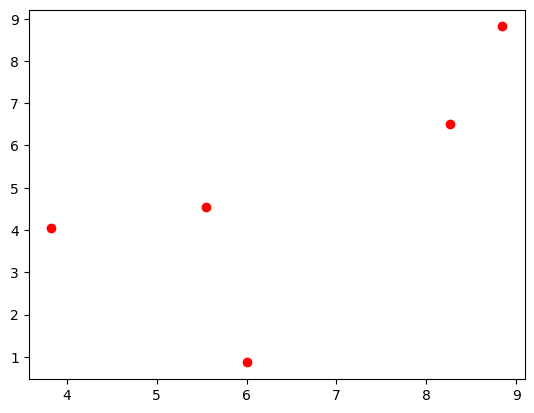

In [68]:
# Testing data size
num_point = 5

# Points for testing
x_sample = np.random.rand(num_point)*10
y_sample = np.random.rand(num_point)*10

# The boundary
xmin = np.min(x_sample)
xmax = np.max(x_sample)
x_range = np.linspace(xmin, xmax, 1000)

# Plot
plt.plot(x_sample, y_sample, 'o', color='r')
plt.show()

<a name='1'></a>
## 1. Homework Requirements

<a name='1-1'></a>
### 1.1. Overall

**Input**: Given n points $P_j(x_j,y_j), j=1,2,\dots,n$ in the plane.

**Output**: The function fitting these points.

Requirement: Implement different fitting methods and make comparisons. The input set of points can be specified interactively with the mouse, or generated by other methods.

![https://i.bmp.ovh/imgs/2020/10/c10f7ef259809aa0.png](https://i.bmp.ovh/imgs/2020/10/c10f7ef259809aa0.png)

<a name='1-2'></a>
### 1.2. Interpolation Type Fitting Method

[1](#2-1). Use a polynomial function (linear combination of power basis functions) $f(x)=\sum_{i=0}^{n-1}\alpha_i B_i(x)$ to interpolate $\{P_j\}$, where $B_i(x)=x^i$ 

[2](#2-2). Use a linear combination of Gaussian basis functions $f(x)=b_0 + \sum_{i=1}^{n}b_i g_i(x)$ to interpolate $\{P_j\}$, where
   $$
   g_i(x)=\exp\left(-\frac{(x-x_i)^2}{2\sigma^2}\right)
   $$
   That is, the axis of symmetry is on the interpolation points, $i=1,\dots,n$, default $\sigma =1$ 

**Considerations**: (1) How to add constraints when there are more variables than equations? (2) The constant term can also be changed to a low-order polynomial (such as 2nd or 3rd order), and corresponding constraints should be added.

<a name='1-3'></a>
### 1.3. Approximation Type Fitting Method

- Fix the highest power of the power basis function to m (m<n), use least squares: $\min E$, where $E(x)=\sum_{i=0}^{n}(y_i-f(x_i))^2$ to fit $\{P_j\}$.
- Ridge Regression: Add a $E_1$ regularization term to the above least squares error function, parameter $\lambda$, $\min (E+\lambda E_1)$, where $E_1=\sum_{i=1}^n\alpha_i^2$ 

**Output format**: ${P_k}(x_k,y_k),k=1,2,\dots,r$. $x_k$ is uniformly sampled along the $x$ axis (r can be taken larger, and the points will be denser), $y_k$ is calculated from the fitted function, and the polyline connecting these points in sequence is drawn as the image of the fitted function.

**Homework Requirements**:

- Implement the above four fitting methods and make comparisons; if drawn at the same time, the curves obtained by the four methods are drawn in different colors;
- The implementation framework is not limited: you can use the provided frameless framework (C++) of the course to do it, or you can use Matlab, etc.;
- Submission (via the SmartChair system): homework report, including methods, experiments, comparison results, etc.

<a name='1-4'></a>
### 1.4. Purpose of the Homework

- Master and familiarize with the general method of function fitting of data;
- Understand the reasons for the good or bad fitting results and think about how to improve the fitting results.


<a name='2'></a>
## 2. Interpolation

<a name='2-1'></a>
### 2.1. Power Basis Function (Polynomial)

In [3]:
def polynomial_interpolation(coefs, x):
    terms = polynomial_terms(x, len(coefs))
    y = np.dot(terms,coefs)
    return y

def polynomial_terms(x, num_terms):
    return np.flip(np.array([np.power(x, i) for i in range(num_terms)]), 0).T

def polynomial_solve(x, y):
    A = polynomial_terms(x, len(x))
    coefs = np.dot(np.linalg.inv(A), y)
    return coefs

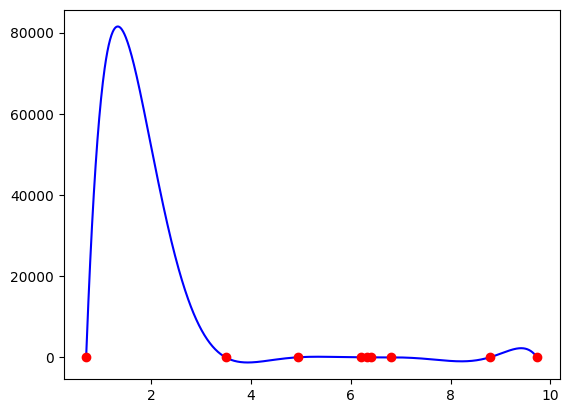

In [6]:
coefs=polynomial_solve(x_sample,y_sample)
y_polynomial = polynomial_interpolation(coefs, x_range)

plt.plot(x_range, y_polynomial, color='b')
plt.plot(x_sample, y_sample, 'o', color='r')
plt.show()

<a name='2-2'></a>
### 2.2. Gaussian Basis Function

In [7]:
def gaussian_interpolation(coefs, x, x_sample):
    terms = gaussian_terms(x, x_sample, len(coefs) - 1)
    y = np.dot(terms,coefs[1:]) + coefs[0]
    return y

def gaussian_terms(x, x_sample, num_terms, sigma=1):
    return np.array([gaussian(x, 1, x_sample[i], sigma) for i in range(num_terms)]).T

def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

def gaussian_solve(x, y, b0):
    A = gaussian_terms(x, x, len(x))
    coefs = np.concatenate(([b0], np.dot(np.linalg.inv(A), y-b0)), axis=0)
    return coefs

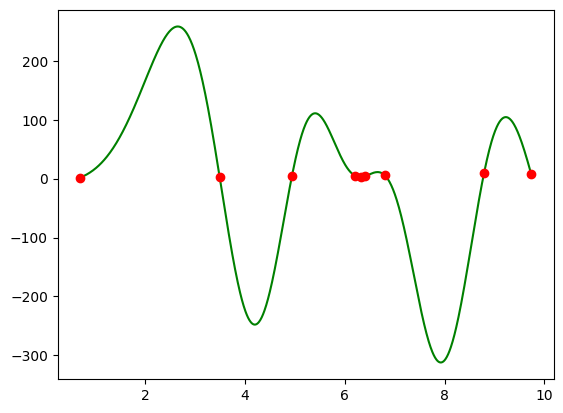

In [13]:
coefs=gaussian_solve(x_sample,y_sample,3)
y_gaussian = gaussian_interpolation(coefs, x_range, x_sample)

plt.plot(x_range, y_gaussian, color='g')
# plt.plot(x_range, polynomial_y, color='b')
plt.plot(x_sample, y_sample, 'o', color='r')
plt.show()

<a name='3'></a>
## 3. Fitting

<a name='3-1'></a>
### 3.1. Power Basis Function (Linear Regression)

In [71]:
def regression(x, y, size):
    A = polynomial_terms(x, size)
    # Gram matrix
    G = np.dot(A.T, A)
    coefs = np.dot(np.dot(np.linalg.inv(G), A.T), y)
    return coefs

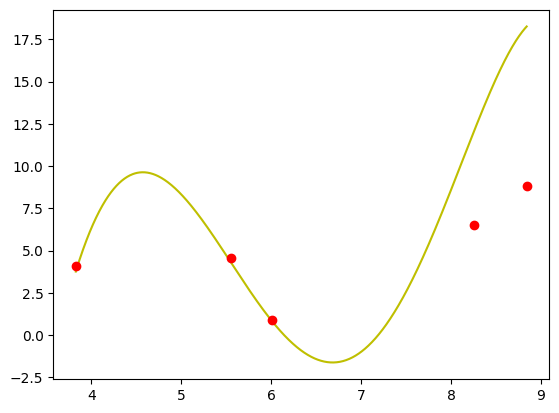

In [72]:
coefs=regression(x_sample,y_sample, 6)
y_regression = polynomial_interpolation(coefs, x_range)

# plt.plot(x_range, polynomial_y, color='b')
plt.plot(x_range, y_regression, color='y')
plt.plot(x_sample, y_sample, 'o', color='r')
plt.show()

<a name='3-2'></a>
### 3.2. Power Basis Function with Regularization term (Ridge Regression)

In [17]:
def regression_ridge(x, y, lambda_=0, size=3):
    A = polynomial_terms(x, size)
    # Gram matrix
    G = np.dot(A.T, A) + lambda_*np.identity(size)
    coefs = np.dot(np.dot(np.linalg.inv(G), A.T), y)
    return coefs

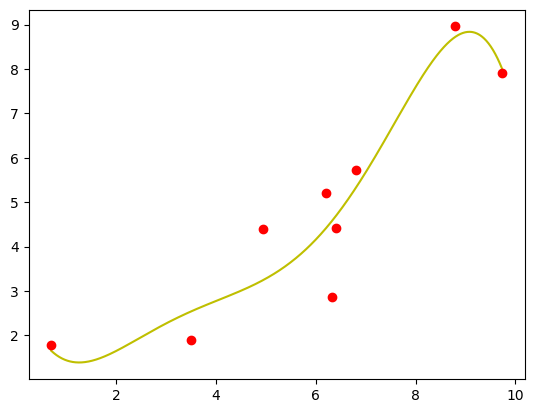

In [18]:
coefs=regression_ridge(x_sample,y_sample, 0.01, 6)
y_ridge_regression = polynomial_interpolation(coefs, x_range)

# plt.plot(x_range, polynomial_y, color='b')
plt.plot(x_range, y_ridge_regression, color='y')
plt.plot(x_sample, y_sample, 'o', color='r')
plt.show()

<a name='4'></a>
## 4. Summary

<a name='4-1'></a>
### 4.1. All Plot in One

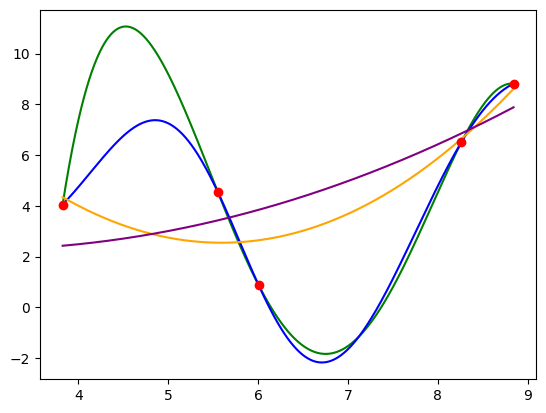

In [73]:
y_polynomial=polynomial_interpolation(polynomial_solve(x_sample,y_sample), x_range)
y_gaussian = gaussian_interpolation(gaussian_solve(x_sample,y_sample,3), x_range, x_sample)

size = num_point - 2
y_regression = polynomial_interpolation(regression(x_sample,y_sample,size), x_range)
y_ridge_regression = polynomial_interpolation(regression_ridge(x_sample,y_sample, 0.1, size), x_range)

plt.plot(x_range, y_polynomial, color='green')
plt.plot(x_range, y_gaussian, color='blue')
plt.plot(x_range, y_regression, color='orange')
plt.plot(x_range, y_ridge_regression, color='purple')
plt.plot(x_sample, y_sample, 'o', color='r')
plt.show()

<a name='4-2'></a>
### 4.2. Interactive Input


Please have check out **./hw1.py** for more detail.

#### 4.2.1. Manual

+ Right click to add points on the canvas
+ Press '**t**' to plot the curves
+ Press '**c**' to clear the canvas

<a name='5'></a>
## 5. Reference